In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/OnlineNewsPopularity.csv')
df.columns = df.columns.str.strip()

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# Dataset basic information
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes.value_counts())
print("\nMissing values:")
print(df.isnull().sum().sum())
print("\nBasic statistics:")
df.describe()

Dataset shape: (39644, 61)

Column names:
['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_n

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


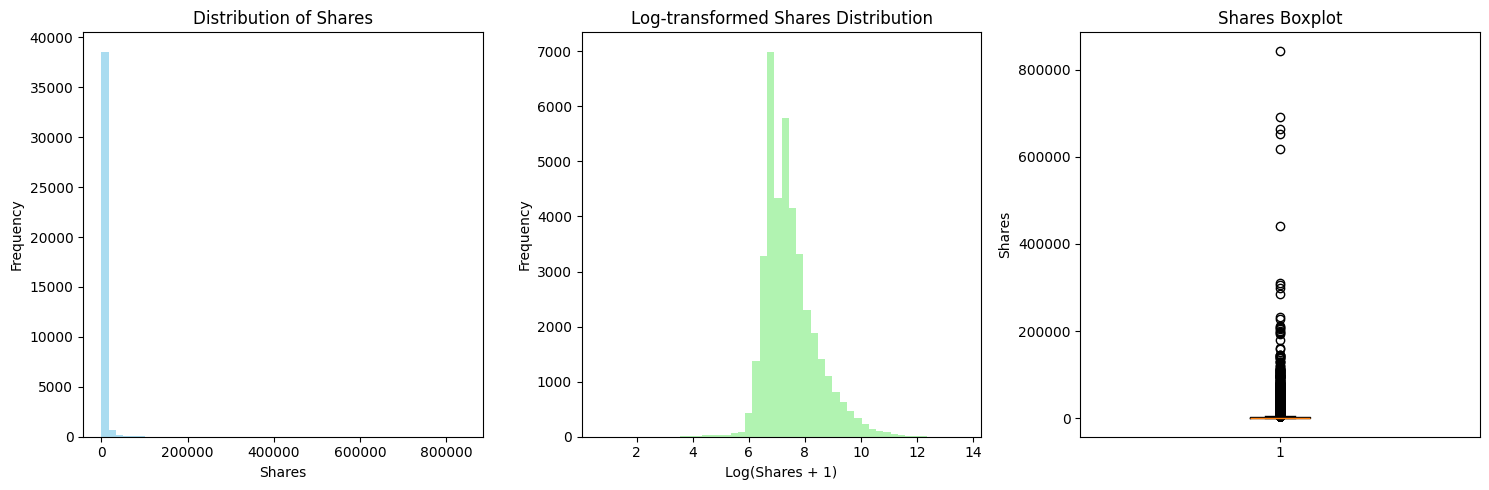

Shares statistics:
Mean: 3395.38
Median: 1400.00
Standard deviation: 11626.95
Min: 1
Max: 843300
Skewness: 33.96


In [5]:
# Target variable (shares) analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['shares'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(np.log1p(df['shares']), bins=50, alpha=0.7, color='lightgreen')
plt.title('Log-transformed Shares Distribution')
plt.xlabel('Log(Shares + 1)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(df['shares'])
plt.title('Shares Boxplot')
plt.ylabel('Shares')

plt.tight_layout()
plt.show()

print("Shares statistics:")
print(f"Mean: {df['shares'].mean():.2f}")
print(f"Median: {df['shares'].median():.2f}")
print(f"Standard deviation: {df['shares'].std():.2f}")
print(f"Min: {df['shares'].min()}")
print(f"Max: {df['shares'].max()}")
print(f"Skewness: {df['shares'].skew():.2f}")

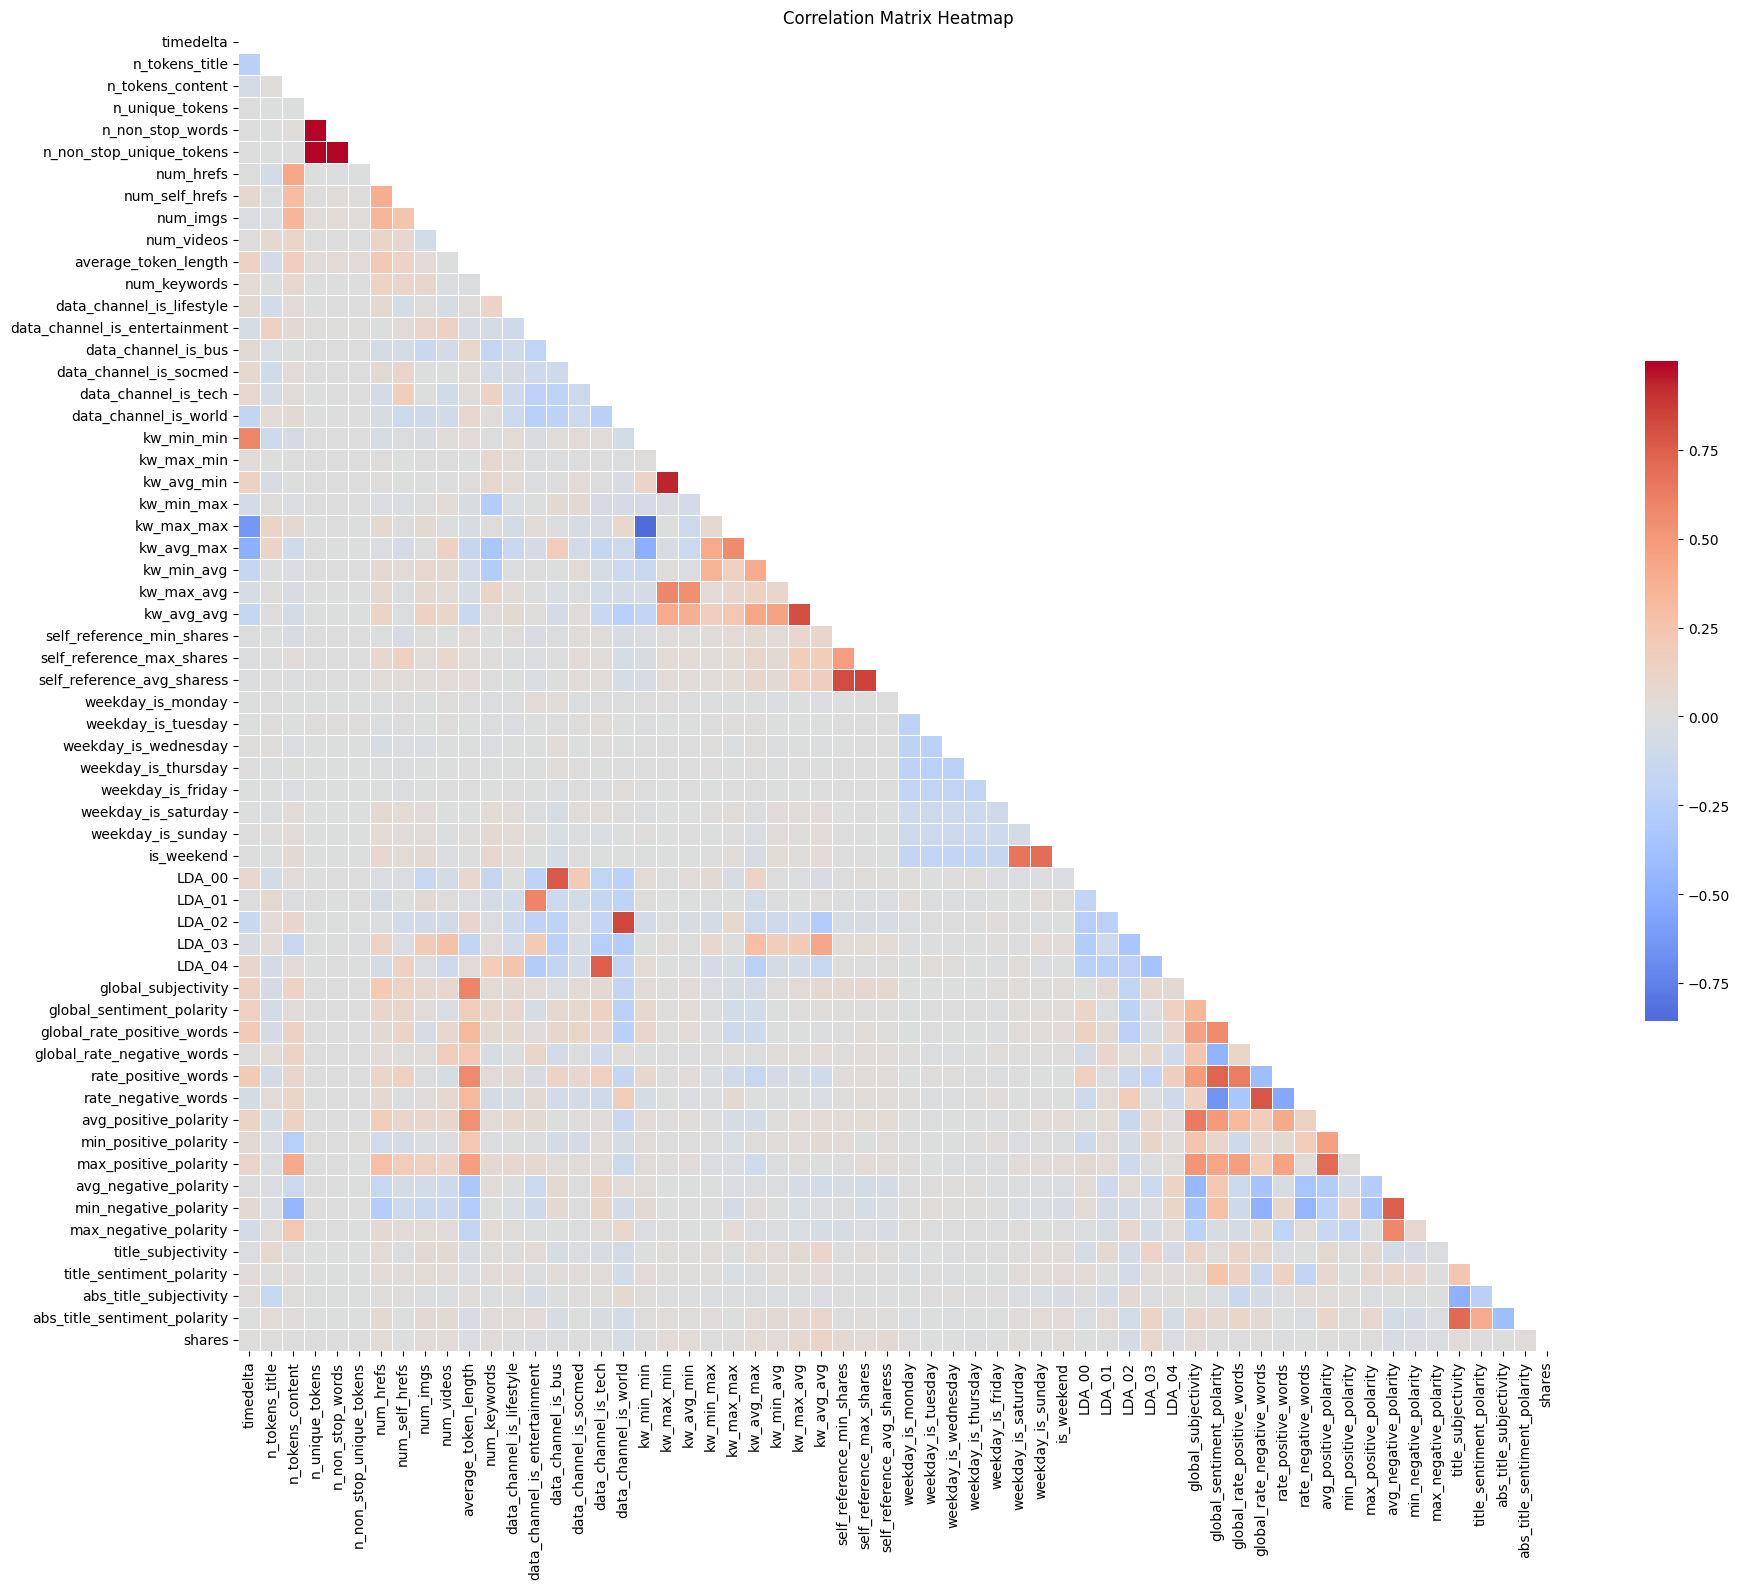

Top 15 features most correlated with shares:
kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
LDA_02                        0.059163
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
data_channel_is_world         0.049497
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
kw_min_avg                    0.039551
num_imgs                      0.039388
avg_negative_polarity         0.032029
global_subjectivity           0.031604
kw_avg_min                    0.030406
Name: shares, dtype: float64


In [6]:
# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Top correlations with shares
shares_corr = corr_matrix['shares'].abs().sort_values(ascending=False)
print("Top 15 features most correlated with shares:")
print(shares_corr.head(16)[1:])  # Exclude shares itself

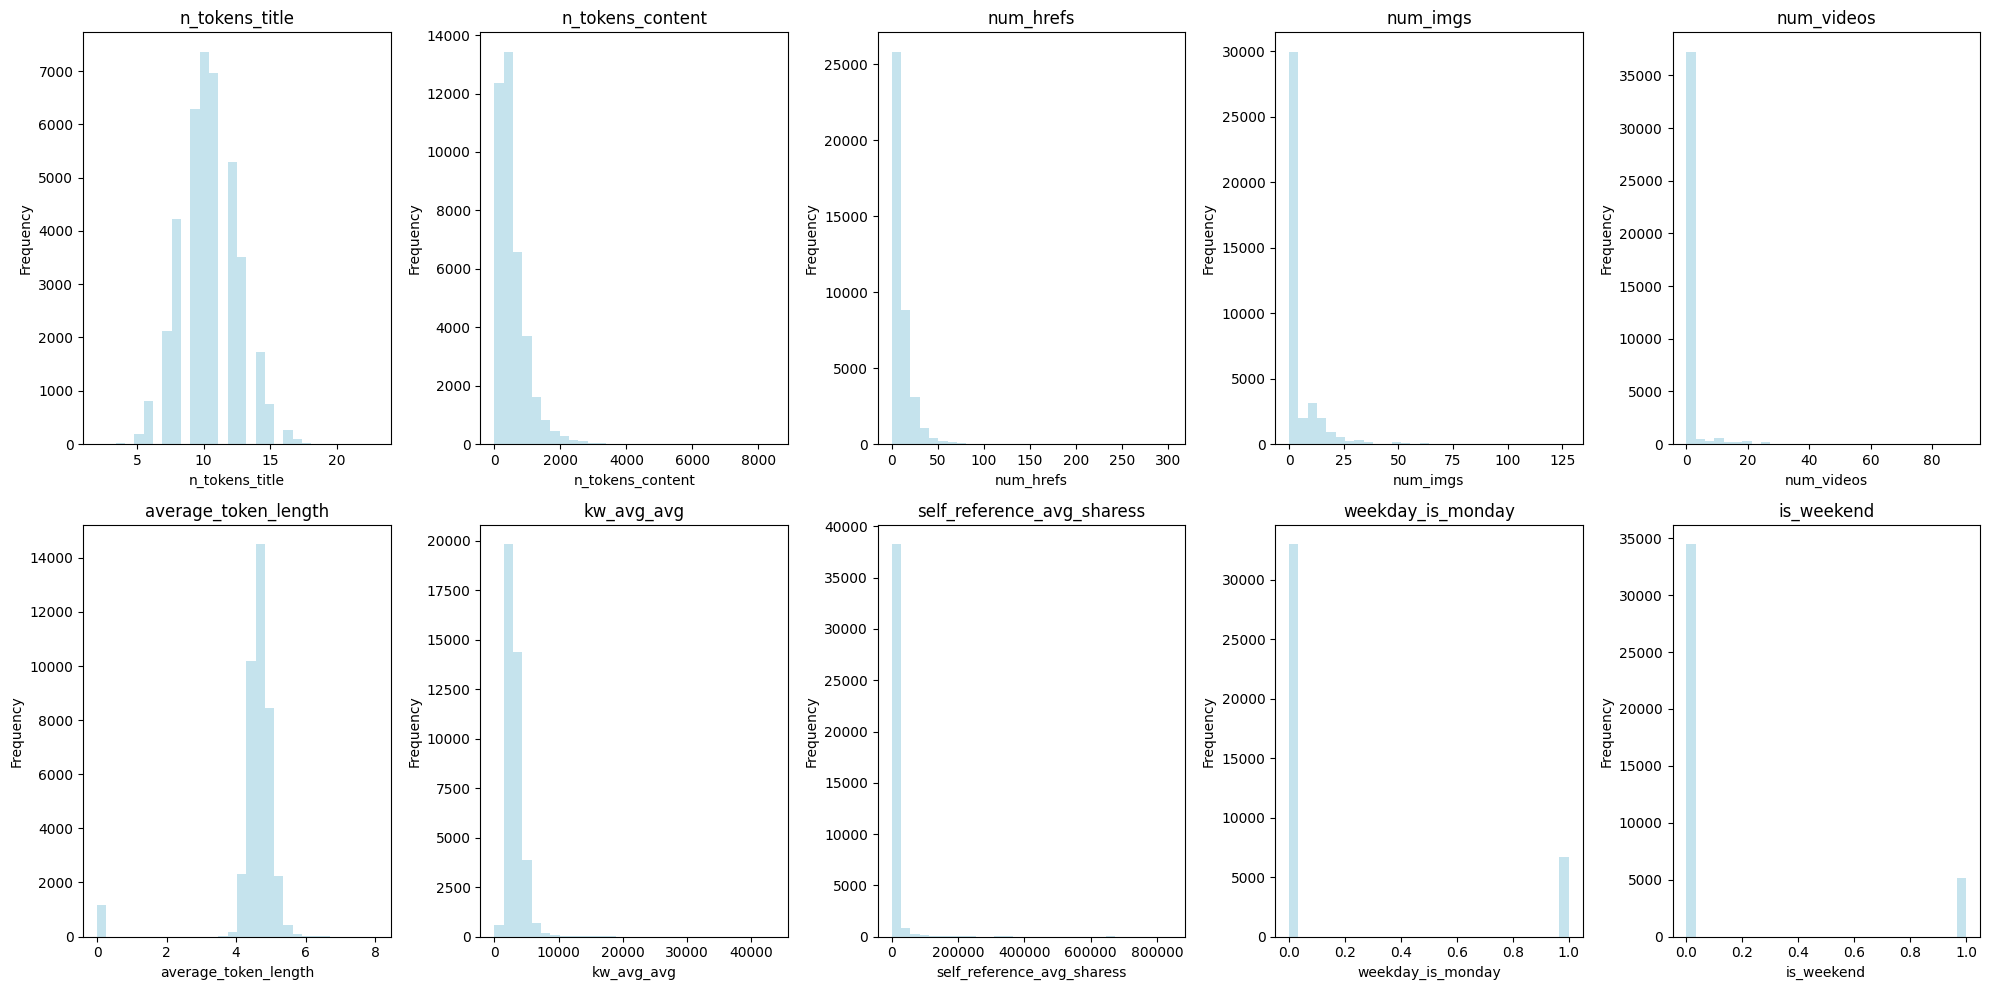

Statistical summary for key features:
       n_tokens_title  n_tokens_content     num_hrefs      num_imgs  \
count    39644.000000      39644.000000  39644.000000  39644.000000   
mean        10.398749        546.514731     10.883690      4.544143   
std          2.114037        471.107508     11.332017      8.309434   
min          2.000000          0.000000      0.000000      0.000000   
25%          9.000000        246.000000      4.000000      1.000000   
50%         10.000000        409.000000      8.000000      1.000000   
75%         12.000000        716.000000     14.000000      4.000000   
max         23.000000       8474.000000    304.000000    128.000000   

         num_videos  average_token_length    kw_avg_avg  \
count  39644.000000          39644.000000  39644.000000   
mean       1.249874              4.548239   3135.858639   
std        4.107855              0.844406   1318.150397   
min        0.000000              0.000000      0.000000   
25%        0.000000        

In [7]:
# Key numerical features analysis
key_features = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 
                'num_videos', 'average_token_length', 'kw_avg_avg', 
                'self_reference_avg_sharess', 'weekday_is_monday', 'is_weekend']

# Filter features that exist in the dataset
existing_features = [f for f in key_features if f in df.columns]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(existing_features):
    if i < len(axes):
        axes[i].hist(df[feature], bins=30, alpha=0.7, color='lightblue')
        axes[i].set_title(f'{feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(existing_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Statistical summary for key features
print("Statistical summary for key features:")
if existing_features:
    print(df[existing_features].describe())

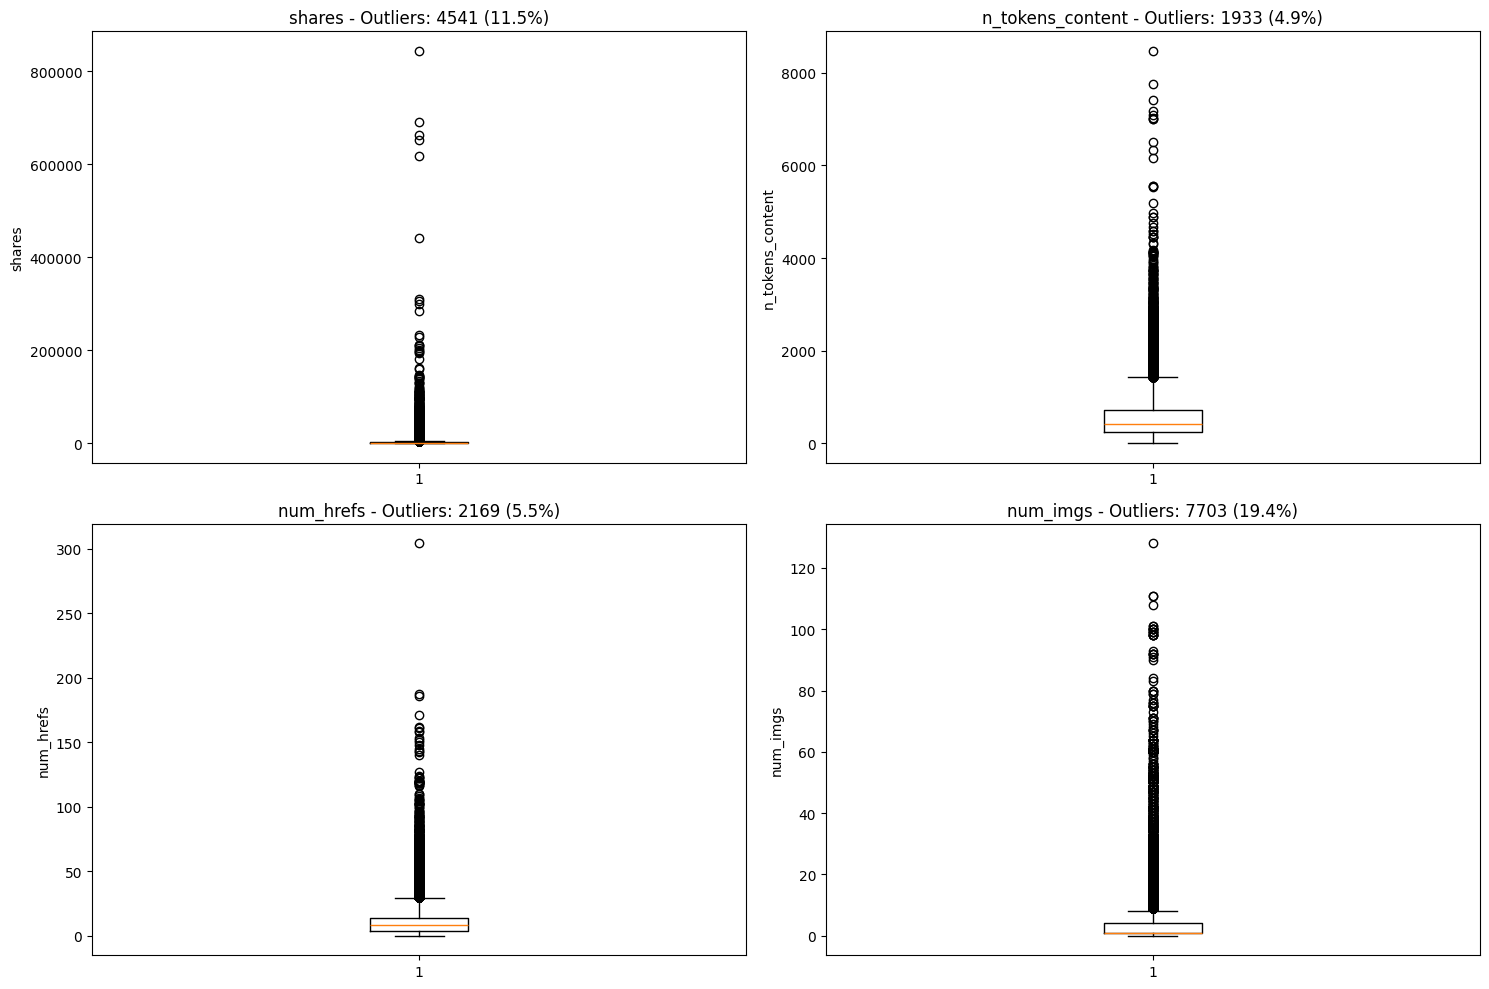

Outlier Summary:
shares: 4541 outliers (11.5%)
n_tokens_content: 1933 outliers (4.9%)
num_hrefs: 2169 outliers (5.5%)
num_imgs: 7703 outliers (19.4%)


In [8]:
# Outlier analysis
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for key features
outlier_features = ['shares', 'n_tokens_content', 'num_hrefs', 'num_imgs']
outlier_summary = {}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(outlier_features):
    if feature in df.columns and i < len(axes):
        outliers, lower, upper = identify_outliers_iqr(df, feature)
        outlier_summary[feature] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower,
            'upper_bound': upper
        }
        
        axes[i].boxplot(df[feature])
        axes[i].set_title(f'{feature} - Outliers: {len(outliers)} ({(len(outliers)/len(df)*100):.1f}%)')
        axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

print("Outlier Summary:")
for feature, stats in outlier_summary.items():
    print(f"{feature}: {stats['count']} outliers ({stats['percentage']:.1f}%)")

In [9]:
# Comprehensive EDA Summary Report
print("="*60)
print("EXPLORATORY DATA ANALYSIS SUMMARY REPORT")
print("="*60)

print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Missing Values: {df.isnull().sum().sum()} total")

print("\n" + "="*40)
print("TARGET VARIABLE ANALYSIS (shares)")
print("="*40)
print(f"Mean: {df['shares'].mean():.2f}")
print(f"Median: {df['shares'].median():.2f}")
print(f"Mode: {df['shares'].mode()[0]}")
print(f"Standard Deviation: {df['shares'].std():.2f}")
print(f"Skewness: {df['shares'].skew():.2f}")
print(f"Kurtosis: {df['shares'].kurtosis():.2f}")
print(f"Range: {df['shares'].min()} - {df['shares'].max()}")

print("\n" + "="*40)
print("FEATURE TYPES DISTRIBUTION")
print("="*40)
data_types = df.dtypes.value_counts()
for dtype, count in data_types.items():
    print(f"{dtype}: {count} columns")

print("\n" + "="*40)
print("HIGH CORRELATION FEATURES WITH TARGET")
print("="*40)
high_corr_features = shares_corr.head(6)[1:]  # Top 5 excluding shares itself
for feature, corr in high_corr_features.items():
    print(f"{feature}: {corr:.3f}")

print("\n" + "="*40)
print("OUTLIER SUMMARY")
print("="*40)
for feature, stats in outlier_summary.items():
    print(f"{feature}: {stats['count']} outliers ({stats['percentage']:.1f}%)")

print("\n" + "="*40)
print("RECOMMENDATIONS FOR MODELING")
print("="*40)
print("1. Target variable is heavily right-skewed - consider log transformation")
print("2. Many outliers detected - consider robust scaling or outlier treatment")
print("3. High correlation features identified for feature selection")
print("4. No missing values detected - data is clean")
print("5. Large dataset suitable for complex models")

print("\n" + "="*40)
print("NEXT STEPS SUGGESTIONS")
print("="*40)
print("1. Feature engineering based on domain knowledge")
print("2. Dimensionality reduction (PCA/feature selection)")
print("3. Target transformation (log, sqrt, etc.)")
print("4. Train-validation-test split")
print("5. Model selection and hyperparameter tuning")

EXPLORATORY DATA ANALYSIS SUMMARY REPORT
Dataset Shape: 39644 rows, 61 columns
Memory Usage: 22.18 MB
Missing Values: 0 total

TARGET VARIABLE ANALYSIS (shares)
Mean: 3395.38
Median: 1400.00
Mode: 1100
Standard Deviation: 11626.95
Skewness: 33.96
Kurtosis: 1832.67
Range: 1 - 843300

FEATURE TYPES DISTRIBUTION
float64: 59 columns
object: 1 columns
int64: 1 columns

HIGH CORRELATION FEATURES WITH TARGET
kw_avg_avg: 0.110
LDA_03: 0.084
kw_max_avg: 0.064
LDA_02: 0.059
self_reference_avg_sharess: 0.058

OUTLIER SUMMARY
shares: 4541 outliers (11.5%)
n_tokens_content: 1933 outliers (4.9%)
num_hrefs: 2169 outliers (5.5%)
num_imgs: 7703 outliers (19.4%)

RECOMMENDATIONS FOR MODELING
1. Target variable is heavily right-skewed - consider log transformation
2. Many outliers detected - consider robust scaling or outlier treatment
3. High correlation features identified for feature selection
4. No missing values detected - data is clean
5. Large dataset suitable for complex models

NEXT STEPS SUGGES

In [10]:
# DATA CLEANING ANALYSIS
print("="*60)
print("DATA CLEANING ASSESSMENT")
print("="*60)

# 1. Check for duplicate records
print("1. DUPLICATE RECORDS CHECK")
print("-" * 30)
duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print(f"Duplicate rows: {duplicate_count} ({duplicate_count/len(df)*100:.2f}%)")

if duplicate_count > 0:
    print("Sample duplicate rows:")
    print(df[duplicates].head())
    
# Check duplicates excluding URL (might be legitimate)
duplicates_no_url = df.drop('url', axis=1).duplicated()
duplicate_no_url_count = duplicates_no_url.sum()
print(f"Duplicates excluding URL: {duplicate_no_url_count} ({duplicate_no_url_count/len(df)*100:.2f}%)")

print(f"\nUnique URLs: {df['url'].nunique()} out of {len(df)} rows")

DATA CLEANING ASSESSMENT
1. DUPLICATE RECORDS CHECK
------------------------------
Duplicate rows: 0 (0.00%)
Duplicates excluding URL: 0 (0.00%)

Unique URLs: 39644 out of 39644 rows


In [11]:
# 2. Check for zero/low variance features
print("\n2. ZERO/LOW VARIANCE FEATURES")
print("-" * 30)

numeric_cols = df.select_dtypes(include=[np.number]).columns
zero_var_features = []
low_var_features = []

for col in numeric_cols:
    variance = df[col].var()
    unique_vals = df[col].nunique()
    
    if variance == 0:
        zero_var_features.append(col)
    elif variance < 0.01 or unique_vals <= 2:
        low_var_features.append((col, variance, unique_vals))

print(f"Zero variance features: {len(zero_var_features)}")
if zero_var_features:
    print("Zero variance features:", zero_var_features)

print(f"\nLow variance features: {len(low_var_features)}")
if low_var_features:
    print("Low variance features (feature, variance, unique_values):")
    for feature, var, unique in low_var_features:
        print(f"  {feature}: var={var:.6f}, unique={unique}")

# Check binary features (might be legitimate)
print(f"\nBinary features (0/1 values):")
binary_features = []
for col in numeric_cols:
    unique_vals = df[col].unique()
    if len(unique_vals) == 2 and set(unique_vals).issubset({0, 1}):
        binary_features.append(col)
        
print(f"Found {len(binary_features)} binary features:")
for bf in binary_features[:10]:  # Show first 10
    print(f"  {bf}: {df[bf].value_counts().to_dict()}")
if len(binary_features) > 10:
    print(f"  ... and {len(binary_features) - 10} more")


2. ZERO/LOW VARIANCE FEATURES
------------------------------
Zero variance features: 0

Low variance features: 19
Low variance features (feature, variance, unique_values):
  data_channel_is_lifestyle: var=0.050144, unique=2
  data_channel_is_entertainment: var=0.146326, unique=2
  data_channel_is_bus: var=0.132940, unique=2
  data_channel_is_socmed: var=0.055164, unique=2
  data_channel_is_tech: var=0.150967, unique=2
  data_channel_is_world: var=0.167386, unique=2
  weekday_is_monday: var=0.139793, unique=2
  weekday_is_tuesday: var=0.151665, unique=2
  weekday_is_wednesday: var=0.152375, unique=2
  weekday_is_thursday: var=0.149709, unique=2
  weekday_is_friday: var=0.123128, unique=2
  weekday_is_saturday: var=0.058049, unique=2
  weekday_is_sunday: var=0.064275, unique=2
  is_weekend: var=0.113779, unique=2
  global_sentiment_polarity: var=0.009396, unique=34695
  global_rate_positive_words: var=0.000304, unique=13159
  global_rate_negative_words: var=0.000117, unique=10271
  min_

In [12]:
# 3. Extreme outliers and data entry errors
print("\n3. EXTREME OUTLIERS AND DATA ENTRY ERRORS")
print("-" * 45)

def detect_extreme_outliers(df, column, multiplier=3):
    """Detect extreme outliers using IQR method with higher multiplier"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    extreme_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return extreme_outliers, lower_bound, upper_bound

# Check for impossible/suspicious values
suspicious_features = []

for col in numeric_cols:
    if col == 'url':
        continue
        
    col_min, col_max = df[col].min(), df[col].max()
    col_mean, col_std = df[col].mean(), df[col].std()
    
    # Check for negative values where they shouldn't exist
    if 'count' in col.lower() or 'num_' in col.lower() or 'n_' in col.lower():
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            suspicious_features.append((col, f"Negative values: {negative_count}"))
    
    # Check for extreme outliers
    extreme_outliers, lower, upper = detect_extreme_outliers(df, col)
    if len(extreme_outliers) > 0:
        extreme_ratio = len(extreme_outliers) / len(df) * 100
        if extreme_ratio > 1:  # More than 1% extreme outliers
            suspicious_features.append((col, f"Extreme outliers: {len(extreme_outliers)} ({extreme_ratio:.1f}%)"))
    
    # Check for values that might be data entry errors (too many digits)
    if col_max > 10000 and col not in ['shares', 'timedelta']:  # Exclude obvious large values
        large_values = (df[col] > 10000).sum()
        if large_values > 0:
            suspicious_features.append((col, f"Unusually large values (>10000): {large_values}"))

print("Suspicious features that might need cleaning:")
for feature, issue in suspicious_features:
    print(f"  {feature}: {issue}")

# Detailed analysis of most extreme cases
print(f"\nMost extreme values analysis:")
extreme_cases = []
for col in ['shares', 'n_tokens_content', 'num_hrefs', 'num_imgs']:
    if col in df.columns:
        max_val = df[col].max()
        max_idx = df[col].idxmax()
        percentile_99 = df[col].quantile(0.99)
        extreme_cases.append((col, max_val, percentile_99, max_val/percentile_99 if percentile_99 > 0 else np.inf))

print("Feature: Max_value (99th_percentile) Ratio")
for col, max_val, p99, ratio in extreme_cases:
    print(f"  {col}: {max_val} ({p99:.0f}) {ratio:.1f}x")


3. EXTREME OUTLIERS AND DATA ENTRY ERRORS
---------------------------------------------
Suspicious features that might need cleaning:
  n_tokens_content: Extreme outliers: 518 (1.3%)
  n_unique_tokens: Extreme outliers: 1182 (3.0%)
  n_non_stop_words: Extreme outliers: 1493 (3.8%)
  n_non_stop_unique_tokens: Extreme outliers: 1236 (3.1%)
  num_hrefs: Extreme outliers: 731 (1.8%)
  num_self_hrefs: Extreme outliers: 783 (2.0%)
  num_imgs: Extreme outliers: 4063 (10.2%)
  num_videos: Extreme outliers: 2174 (5.5%)
  average_token_length: Extreme outliers: 1216 (3.1%)
  data_channel_is_lifestyle: Extreme outliers: 2099 (5.3%)
  data_channel_is_entertainment: Extreme outliers: 7057 (17.8%)
  data_channel_is_bus: Extreme outliers: 6258 (15.8%)
  data_channel_is_socmed: Extreme outliers: 2323 (5.9%)
  data_channel_is_tech: Extreme outliers: 7346 (18.5%)
  data_channel_is_world: Extreme outliers: 8427 (21.3%)
  kw_min_min: Negative values: 22980
  kw_min_min: Extreme outliers: 4677 (11.8%)
  k

In [13]:
# 4. Feature value ranges and validity check
print("\n4. FEATURE VALUE RANGES AND VALIDITY")
print("-" * 40)

# Check percentage/ratio features (should be between 0 and 1)
percentage_features = []
for col in numeric_cols:
    if any(keyword in col.lower() for keyword in ['rate', 'ratio', 'polarity', 'subjectivity']):
        col_min, col_max = df[col].min(), df[col].max()
        if col_max > 1 or col_min < -1:
            percentage_features.append((col, col_min, col_max))

print("Features that might be percentages/ratios with invalid ranges:")
for col, min_val, max_val in percentage_features:
    print(f"  {col}: [{min_val:.3f}, {max_val:.3f}]")

# Check if weekday features sum to 1 (only one day should be 1)
weekday_cols = [col for col in df.columns if 'weekday_is_' in col]
if weekday_cols:
    weekday_sum = df[weekday_cols].sum(axis=1)
    invalid_weekdays = (weekday_sum != 1).sum()
    print(f"\nWeekday validation:")
    print(f"  Found {len(weekday_cols)} weekday columns")
    print(f"  Rows with invalid weekday sum: {invalid_weekdays}")
    if invalid_weekdays > 0:
        print(f"  Weekday sum distribution: {weekday_sum.value_counts().head()}")

# Check data channel features (should be mutually exclusive)
channel_cols = [col for col in df.columns if 'data_channel_is_' in col]
if channel_cols:
    channel_sum = df[channel_cols].sum(axis=1)
    invalid_channels = (channel_sum > 1).sum()
    zero_channels = (channel_sum == 0).sum()
    print(f"\nData channel validation:")
    print(f"  Found {len(channel_cols)} channel columns")
    print(f"  Rows with multiple channels: {invalid_channels}")
    print(f"  Rows with no channel: {zero_channels}")

# Check for impossible combinations
print(f"\nImpossible value combinations:")
impossible_issues = []

# Check if content length vs token count makes sense
if 'n_tokens_content' in df.columns and 'n_non_stop_words' in df.columns:
    weird_ratios = df[df['n_tokens_content'] < df['n_non_stop_words']]
    if len(weird_ratios) > 0:
        impossible_issues.append(f"Rows where n_tokens_content < n_non_stop_words: {len(weird_ratios)}")

# Check if unique tokens ratio is logical
if 'n_unique_tokens' in df.columns and 'n_tokens_content' in df.columns:
    invalid_unique_ratio = df[df['n_unique_tokens'] > 1]
    if len(invalid_unique_ratio) > 0:
        impossible_issues.append(f"Rows where unique_tokens_ratio > 1: {len(invalid_unique_ratio)}")

for issue in impossible_issues:
    print(f"  {issue}")


4. FEATURE VALUE RANGES AND VALIDITY
----------------------------------------
Features that might be percentages/ratios with invalid ranges:

Weekday validation:
  Found 7 weekday columns
  Rows with invalid weekday sum: 0

Data channel validation:
  Found 6 channel columns
  Rows with multiple channels: 0
  Rows with no channel: 6134

Impossible value combinations:
  Rows where unique_tokens_ratio > 1: 1


In [14]:
# 5. Highly correlated features for potential removal
print("\n5. HIGHLY CORRELATED FEATURES")
print("-" * 35)

# Find pairs of highly correlated features
def find_high_correlations(corr_matrix, threshold=0.9):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            if corr_val >= threshold:
                col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]
                high_corr_pairs.append((col1, col2, corr_val))
    return sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)

# Different correlation thresholds
thresholds = [0.95, 0.90, 0.85]
for threshold in thresholds:
    high_corr_pairs = find_high_correlations(corr_matrix, threshold)
    print(f"\nFeature pairs with correlation >= {threshold}:")
    print(f"Found {len(high_corr_pairs)} highly correlated pairs")
    
    if len(high_corr_pairs) > 0:
        print("Top 10 most correlated pairs:")
        for i, (col1, col2, corr) in enumerate(high_corr_pairs[:10]):
            print(f"  {i+1:2d}. {col1[:20]:<20} <-> {col2[:20]:<20} (r={corr:.3f})")
        if len(high_corr_pairs) > 10:
            print(f"      ... and {len(high_corr_pairs) - 10} more pairs")

# Identify features that appear frequently in high correlations (potential candidates for removal)
if len(find_high_correlations(corr_matrix, 0.85)) > 0:
    feature_frequency = {}
    for col1, col2, corr in find_high_correlations(corr_matrix, 0.85):
        feature_frequency[col1] = feature_frequency.get(col1, 0) + 1
        feature_frequency[col2] = feature_frequency.get(col2, 0) + 1
    
    print(f"\nFeatures appearing most frequently in high correlations (>= 0.85):")
    sorted_features = sorted(feature_frequency.items(), key=lambda x: x[1], reverse=True)
    for feature, count in sorted_features[:10]:
        print(f"  {feature}: appears in {count} high-correlation pairs")


5. HIGHLY CORRELATED FEATURES
-----------------------------------

Feature pairs with correlation >= 0.95:
Found 3 highly correlated pairs
Top 10 most correlated pairs:
   1. n_unique_tokens      <-> n_non_stop_unique_to (r=1.000)
   2. n_unique_tokens      <-> n_non_stop_words     (r=1.000)
   3. n_non_stop_words     <-> n_non_stop_unique_to (r=1.000)

Feature pairs with correlation >= 0.9:
Found 4 highly correlated pairs
Top 10 most correlated pairs:
   1. n_unique_tokens      <-> n_non_stop_unique_to (r=1.000)
   2. n_unique_tokens      <-> n_non_stop_words     (r=1.000)
   3. n_non_stop_words     <-> n_non_stop_unique_to (r=1.000)
   4. kw_max_min           <-> kw_avg_min           (r=0.941)

Feature pairs with correlation >= 0.85:
Found 6 highly correlated pairs
Top 10 most correlated pairs:
   1. n_unique_tokens      <-> n_non_stop_unique_to (r=1.000)
   2. n_unique_tokens      <-> n_non_stop_words     (r=1.000)
   3. n_non_stop_words     <-> n_non_stop_unique_to (r=1.000)
   4.

In [15]:
# 6. Feature relevance and importance analysis
print("\n6. FEATURE RELEVANCE ANALYSIS")
print("-" * 35)

# Identify potentially irrelevant features
irrelevant_features = []

# Features with very low correlation to target
low_target_corr = shares_corr[shares_corr < 0.01]
print(f"Features with very low correlation to target (<0.01): {len(low_target_corr)}")
if len(low_target_corr) > 0:
    print("Bottom 10 features by target correlation:")
    for feature, corr in low_target_corr.tail(10).items():
        print(f"  {feature}: {corr:.4f}")

# URL feature analysis (usually not useful for modeling)
if 'url' in df.columns:
    print(f"\nURL feature analysis:")
    print(f"  Unique URLs: {df['url'].nunique()} / {len(df)} total")
    print(f"  URL feature should likely be dropped for modeling")

# Timedelta analysis
if 'timedelta' in df.columns:
    print(f"\nTimedelta feature analysis:")
    print(f"  Unique values: {df['timedelta'].nunique()}")
    print(f"  Range: {df['timedelta'].min()} to {df['timedelta'].max()}")
    print(f"  Might be useful as-is or need transformation")

print(f"\n" + "="*60)
print("DATA CLEANING RECOMMENDATIONS")
print("="*60)

print("\n🔍 FEATURES TO CONSIDER REMOVING:")
print("-" * 35)

# 1. Zero variance features
if zero_var_features:
    print(f"1. Zero variance features ({len(zero_var_features)}): {zero_var_features}")

# 2. High correlation features
high_corr_95 = find_high_correlations(corr_matrix, 0.95)
if high_corr_95:
    print(f"2. One feature from each highly correlated pair (r>=0.95): {len(high_corr_95)} pairs")
    redundant_features = []
    for col1, col2, corr in high_corr_95[:5]:  # Show top 5
        # Suggest keeping the one with higher target correlation
        col1_target_corr = abs(shares_corr.get(col1, 0))
        col2_target_corr = abs(shares_corr.get(col2, 0))
        keep, remove = (col1, col2) if col1_target_corr > col2_target_corr else (col2, col1)
        redundant_features.append(remove)
        print(f"   Keep '{keep}' (r={col1_target_corr:.3f}), remove '{remove}' (r={col2_target_corr:.3f})")

# 3. URL and potentially irrelevant features
print(f"3. Non-predictive features: 'url' (identifier only)")

# 4. Low variance binary features (if any are problematic)
problematic_binary = [bf for bf in binary_features if df[bf].mean() < 0.01 or df[bf].mean() > 0.99]
if problematic_binary:
    print(f"4. Highly imbalanced binary features: {problematic_binary}")

print(f"\n🔧 DATA QUALITY ISSUES TO FIX:")
print("-" * 35)
if suspicious_features:
    for i, (feature, issue) in enumerate(suspicious_features[:5], 1):
        print(f"{i}. {feature}: {issue}")

print(f"\n📊 RECOMMENDED CLEANING STEPS:")
print("-" * 35)
print("1. Remove 'url' column (identifier, not predictive)")
print("2. Handle extreme outliers (cap at 99th percentile or remove)")
print("3. Remove zero variance features (if any)")
print("4. Remove one feature from highly correlated pairs (r >= 0.95)")
print("5. Consider log transformation for skewed features")
print("6. Validate and fix data quality issues found above")

# Calculate potential dimensionality reduction
features_to_remove = len(zero_var_features) + len(high_corr_95) + 1  # +1 for URL
print(f"\nPotential dimensionality reduction: {df.shape[1]} -> {df.shape[1] - features_to_remove} features")


6. FEATURE RELEVANCE ANALYSIS
-----------------------------------
Features with very low correlation to target (<0.01): 25
Bottom 10 features by target correlation:
  LDA_00: 0.0038
  n_tokens_content: 0.0025
  num_self_hrefs: 0.0019
  abs_title_subjectivity: 0.0015
  kw_min_min: 0.0011
  n_unique_tokens: 0.0008
  global_rate_positive_words: 0.0005
  n_non_stop_words: 0.0004
  n_non_stop_unique_tokens: 0.0001
  min_positive_polarity: 0.0000

URL feature analysis:
  Unique URLs: 39644 / 39644 total
  URL feature should likely be dropped for modeling

Timedelta feature analysis:
  Unique values: 724
  Range: 8.0 to 731.0
  Might be useful as-is or need transformation

DATA CLEANING RECOMMENDATIONS

🔍 FEATURES TO CONSIDER REMOVING:
-----------------------------------
2. One feature from each highly correlated pair (r>=0.95): 3 pairs
   Keep 'n_unique_tokens' (r=0.001), remove 'n_non_stop_unique_tokens' (r=0.000)
   Keep 'n_unique_tokens' (r=0.001), remove 'n_non_stop_words' (r=0.000)
   